# Linear Regression Model

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
This code is the implementation of linear regression model for yield 
predication.

We are using linear regression model which is imported from Sklearn library.

Data is comprised of 234 samples. Each training sample is consist of 16 input
features(x1,x2,x3,....) and corresponding output(y) i.e yield.

x1= Flied 
x2= Seed
x3= max temp
x4= min temp
x5= Wind speed
x6= humidity
x7= Precipitation
x8= Rain fall
x9= N
x10=P
x11=K
x12=NDVI
x13=NDMI
x14=MSAVI
x15=NRDE
x16= Soil fertility

y= Yield 

linear model
h=theta0+ theta1*x1+ theta2*x2+ theta3*x3 .......theta16*x16

these theta's are trained during training.

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

1. Importing required packages.
2. Read the data/load the data.
3. Data Cleaning.
4. Visualizing the data, how data looks like.
5. Spliting dataset into training and testing data.
6. Imported Linear regression model is Trained using training data
7. Predication is performed by trained model using testing data
8. Evaluate the Model: Measure the Mean Sqaure Error
9. Prediction for the new sample



# Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
%matplotlib inline

#  Read the data/load the data

In [6]:
# we are using pandas libaray for reading the file
# We are reading ecxel file and path should be where you ecxel file is located.
# place "r" before the path string to address special character,such as '\'.
# Don't forget to put the file name at the end of the path + '.xlsx'

data=pd.read_excel(r"C:\python\Yield Predicition\plain 1.xlsx")


In [7]:
#Showing the first five entries of data
data.head()

,Field #,Seed,Month,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI,MSAVI,NRDE,Soil Fertility,Yield
0,1,1,2019-02-01,21.2,10.2,2.0,73.6,0.0,40.7,103,57,50,0.33,0.23,0.13,-0.03,2,818
1,1,1,2019-03-01,28.6,14.4,2.3,63.4,0.0,29.1,103,57,50,0.22,0.13,0.08,-0.10,2,818
2,1,1,2019-04-01,34.3,20.5,1.9,51.8,2.4,53.6,103,57,50,0.21,0.14,0.11,-0.07,2,818
3,1,1,2019-05-01,31.7,21.5,3.7,57.5,1.6,48.9,103,57,50,0.29,0.19,0.14,-0.01,2,818
4,1,1,2019-06-01,42.9,28.8,3.2,39.6,1.4,28.9,103,57,50,0.29,0.20,0.14,0.00,2,818


# Data Cleaning

In [8]:
# As there some extra columns so we need to perform data cleaning
# We are droping column  design number,5,6,7,8, and 9

data.drop(columns='Month', inplace=True)
data.head()

,Field #,Seed,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI,MSAVI,NRDE,Soil Fertility,Yield
0,1,1,21.2,10.2,2.0,73.6,0.0,40.7,103,57,50,0.33,0.23,0.13,-0.03,2,818
1,1,1,28.6,14.4,2.3,63.4,0.0,29.1,103,57,50,0.22,0.13,0.08,-0.10,2,818
2,1,1,34.3,20.5,1.9,51.8,2.4,53.6,103,57,50,0.21,0.14,0.11,-0.07,2,818
3,1,1,31.7,21.5,3.7,57.5,1.6,48.9,103,57,50,0.29,0.19,0.14,-0.01,2,818
4,1,1,42.9,28.8,3.2,39.6,1.4,28.9,103,57,50,0.29,0.20,0.14,0.00,2,818


# Visualizing the data, how data looks like.

In [9]:
# Information about your data, how many entries and which type of data is present in dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Field #             234 non-null    int64  
 1   Seed                234 non-null    int64  
 2   Max t°C             234 non-null    float64
 3   Min t°C             234 non-null    float64
 4   Wind Speed (m/s)    234 non-null    float64
 5   Humidity (%)        234 non-null    float64
 6   Precipitation (mm)  234 non-null    float64
 7   Rainfall            234 non-null    float64
 8   N                   234 non-null    int64  
 9   P                   234 non-null    int64  
 10  K                   234 non-null    int64  
 11  NDVI                234 non-null    float64
 12  NDMI                234 non-null    float64
 13  MSAVI               234 non-null    float64
 14  NRDE                234 non-null    float64
 15  Soil Fertility      234 non-null    int64  
 16  Yield   

In [10]:
#tells the shape of dataframe
data.shape

(234, 17)

<AxesSubplot:>

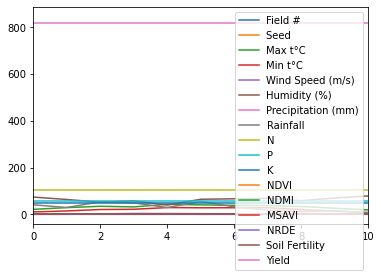

In [13]:
data.plot(xlim=(0,10))

#data.plot(kind='scatter', x='W (mixer vertical length -mm)', y='MixingIndex', figsize=(6,6))

<AxesSubplot:xlabel='Rainfall', ylabel='Yield'>

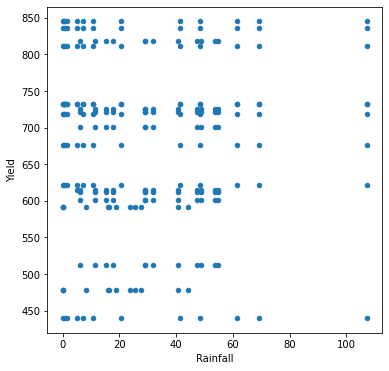

In [14]:
data.plot(kind='scatter', x='Rainfall', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='Precipitation (mm)', ylabel='Yield'>

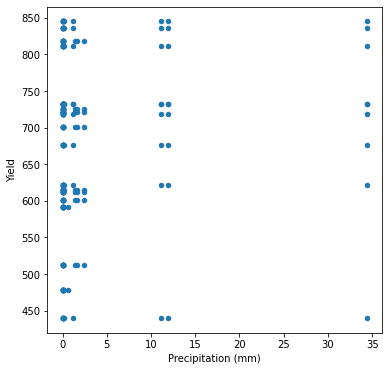

In [15]:
data.plot(kind='scatter', x='Precipitation (mm)', y='Yield', figsize=(6,6))

<AxesSubplot:xlabel='Humidity (%)', ylabel='Yield'>

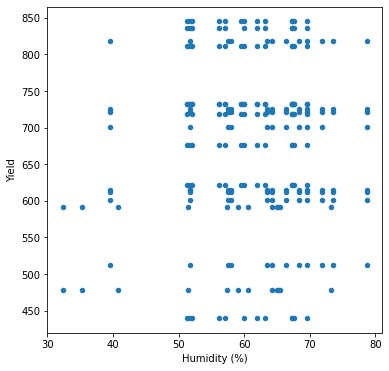

In [16]:
data.plot(kind='scatter', x='Humidity (%)', y='Yield', figsize=(6,6))

# Spliting dataset into training and testing data

Total of 60 samples we are taking first 190 samples as training data and last 44 samples as testing data

In [19]:
#Training data
training_data=data.iloc[:190, 0:15]
training_data.head()

,Field #,Seed,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI,MSAVI,NRDE
0,1,1,21.2,10.2,2.0,73.6,0.0,40.7,103,57,50,0.33,0.23,0.13,-0.03
1,1,1,28.6,14.4,2.3,63.4,0.0,29.1,103,57,50,0.22,0.13,0.08,-0.10
2,1,1,34.3,20.5,1.9,51.8,2.4,53.6,103,57,50,0.21,0.14,0.11,-0.07
3,1,1,31.7,21.5,3.7,57.5,1.6,48.9,103,57,50,0.29,0.19,0.14,-0.01
4,1,1,42.9,28.8,3.2,39.6,1.4,28.9,103,57,50,0.29,0.20,0.14,0.00


In [20]:
training_data.shape

(190, 15)

In [21]:
training_data.describe()

,Field #,Seed,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI,MSAVI,NRDE
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,4.057895,1.742105,31.144211,18.610526,2.105263,61.337895,2.404211,30.013895,93.084211,45.810526,40.552632,0.455211,0.307474,0.252105,0.080053
std,2.034573,0.438632,7.164599,7.613348,1.154734,9.089452,6.951121,25.657109,22.117131,16.931105,14.636147,0.172454,0.131857,0.128540,0.120828
min,1.000000,1.000000,18.500000,5.000000,0.300000,32.300000,0.000000,0.000000,51.000000,23.000000,0.000000,0.140000,0.090000,0.010000,-0.210000
25%,2.000000,1.000000,26.200000,10.500000,1.100000,56.400000,0.000000,7.300000,69.500000,24.250000,25.000000,0.300000,0.190000,0.140000,-0.010000
50%,4.000000,2.000000,31.900000,19.400000,1.900000,63.100000,0.000000,28.900000,103.000000,52.000000,50.000000,0.455000,0.295000,0.250000,0.090000
75%,6.000000,2.000000,36.900000,26.500000,2.600000,67.600000,1.200000,48.300000,110.000000,57.000000,50.000000,0.590000,0.417500,0.340000,0.167500
max,8.000000,2.000000,44.900000,30.900000,5.600000,78.700000,34.400000,107.200000,120.000000,69.000000,50.000000,0.810000,0.630000,0.530000,0.350000


In [22]:
training_label=data.iloc[:190, -1]
training_label.head()

0    818
1    818
2    818
3    818
4    818
Name: Yield, dtype: int64

In [23]:
print('shape:', training_label.shape)
print('type:', training_label.dtype)

shape: (190,)
type: int64


In [24]:
#testing data

testing_data=data.iloc[190:, 0:15]
testing_data.head()

,Field #,Seed,Max t°C,Min t°C,Wind Speed (m/s),Humidity (%),Precipitation (mm),Rainfall,N,P,K,NDVI,NDMI,MSAVI,NRDE
190,8,2,40.3,27.9,3.0,64.3,0.0,54.9,99,31,32,0.46,0.28,0.25,0.04
191,8,2,38.4,28.0,1.8,66.3,0.0,32.0,99,31,32,0.40,0.23,0.23,0.03
192,8,2,37.4,28.2,1.4,68.4,0.0,17.8,99,31,32,0.67,0.47,0.43,0.17
193,8,2,33.2,20.2,1.6,58.0,0.0,11.5,99,31,32,0.51,0.36,0.32,0.09
194,8,2,26.2,14.1,1.9,69.6,0.0,15.4,99,31,32,0.57,0.37,0.34,0.08


In [25]:
testing_label=data.iloc[190:, -1]
testing_label.head()

190    725
191    725
192    725
193    725
194    725
Name: Yield, dtype: int64

# Imported Linear regression model is Trained using training data

In [26]:
# linear regression model from sklearn is used
# normalization is performed
model = linear_model.LinearRegression(normalize=True)

#model is trained using our data
model.fit(training_data,training_label)

LinearRegression(normalize=True)

# Predication is performed by trained model using testing data

In [27]:
# Now prediction is formed using trained model
y_predicted = model.predict(testing_data)

Feature: 0, Score: 4.17805
Feature: 1, Score: -91.31120
Feature: 2, Score: 0.68668
Feature: 3, Score: -2.81925
Feature: 4, Score: -2.61576
Feature: 5, Score: -0.62879
Feature: 6, Score: 2.11627
Feature: 7, Score: 0.25172
Feature: 8, Score: 2.98962
Feature: 9, Score: -0.72427
Feature: 10, Score: -2.91161
Feature: 11, Score: -2.34323
Feature: 12, Score: -208.96636
Feature: 13, Score: 164.26565
Feature: 14, Score: 137.84286


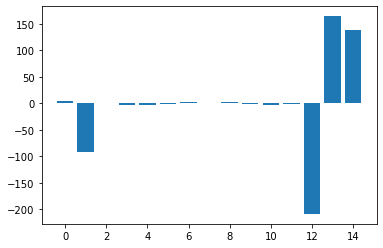

In [28]:
# Checking the importance of features
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Evaluate the Model: Measure the Mean Sqaure Error

In [29]:
# Model is evaluated by measuring Mean squared error
print("Mean squared error is: ", mean_squared_error(testing_label, y_predicted))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

Mean squared error is:  35340.90292224623
Weights:  [   4.17804507  -91.3111977     0.68667707   -2.81925262   -2.61575587
   -0.62879242    2.11627145    0.25172447    2.98961938   -0.7242743
   -2.91160904   -2.34322596 -208.96636412  164.2656471   137.84285883]
Intercept:  780.6875017992245


#  Prediction for the new sample

In [24]:
#Just for checking I have taken testing sample

In [30]:
print('input features')
testing_data.iloc[3]

input features


Field #                8.00
Seed                   2.00
Max t°C               33.20
Min t°C               20.20
Wind Speed (m/s)       1.60
Humidity (%)          58.00
Precipitation (mm)     0.00
Rainfall              11.50
N                     99.00
P                     31.00
K                     32.00
NDVI                   0.51
NDMI                   0.36
MSAVI                  0.32
NRDE                   0.09
Name: 193, dtype: float64

In [31]:
print('Yield')
testing_label.iloc[3]

Yield


725

In [27]:
# Here you can enter new input in array below

In [32]:
test_sample= np.array([8,2,33,20.20,1.6,58,0,11.50,99,31,32,0.51,0.36,0.32,0.09])
test_sample

array([8.00e+00, 2.00e+00, 3.30e+01, 2.02e+01, 1.60e+00, 5.80e+01,
       0.00e+00, 1.15e+01, 9.90e+01, 3.10e+01, 3.20e+01, 5.10e-01,
       3.60e-01, 3.20e-01, 9.00e-02])

In [33]:
test_sample.shape

(15,)

In [34]:
type(test_sample)

numpy.ndarray

In [35]:
test_sample.ndim

1

In [37]:
test_sample=test_sample.reshape(1,15)
print(test_sample.shape)
print(test_sample.ndim)

(1, 15)
2


In [38]:
y_predicted = model.predict(test_sample)

In [39]:
y_predicted

array([728.33682259])